In [72]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from random import randrange
from scipy.optimize import fmin_bfgs

In [73]:
mat = scipy.io.loadmat('machine-learning-ex3\ex3\ex3data1.mat')
X = mat['X']
y = mat['y'].flatten()
y[y==10] = 0
def pixelToImage(pixelArr):
    img = []
    for i in range(0,19):
        img.append(pixelArr[i*20:i*20+20])
    return img

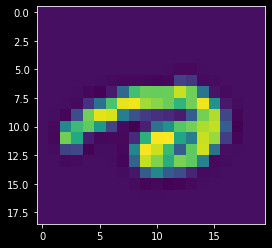

In [74]:
randomimg = pixelToImage(X[randrange(5000)])

plt.imshow(randomimg,interpolation='none')

In [75]:
def costFunction(theta, X, y, lamb=0):
    hx = sigmoid(X.dot(theta))

    J = -1/m*(np.log(hx).T.dot(y)+np.log(1-hx).T.dot(1-y))
    J += lamb/(2*m)*(sum(np.power(theta[1:],2)))
    return J

def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

def gradient(theta,X, y, lamb=0):

    # fmin_bfgs gives one dim theta so need to add one more dim
    temp = sigmoid(np.dot(X, theta[...,np.newaxis]))
    temp = temp-y
    temp = np.dot(X.T, temp)
    temptheta = np.copy(theta)
    temptheta[0] = 0
    temptheta = temptheta[:,np.newaxis]
    theta = (1/m) * temp + (lamb/m) * temptheta
    return theta.flatten()

In [78]:
def oneVsAllClass(theta,X,y,lamb=0):
    res = fmin_bfgs(costFunction,theta, args=(X,y,lamb),fprime=gradient)
    return res

def getTheta(lamd=0):
    print('a')
def setYfornumber(yInput,i):
    y = np.copy(yInput)
    y[y!=i] = 0
    y[y==i] = 1
    return y

print(setYfornumber(y,0))
print(y)
theta = np.zeros((X.shape[1],10))
for i in range(0,10):
    theta[:,i] = oneVsAllClass(theta[:,i],X,y,0)
    


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


NameError: name 'm' is not defined